### Regression using numpy (with pandas and pyplot)

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read Cities.csv into dataframe
f = open('Cities.csv','rU')
cities = pd.read_csv(f)

In [6]:
cities = pd.DataFrame.from_csv("Cities.csv")

In [8]:
cities.head(5)

,country,latitude,longitude,temperature
city,,,,
Aalborg,Denmark,57.03,9.92,7.52
Aberdeen,United Kingdom,57.17,-2.08,8.10
Abisko,Sweden,63.35,18.83,0.20
Adana,Turkey,36.99,35.32,18.67
Albacete,Spain,39.00,-1.87,12.62


In [13]:
cities.describe()

,latitude,longitude,temperature
count,213.000000,213.000000,213.000000
mean,47.499906,15.374319,9.497840
std,6.730961,13.068014,3.561231
min,36.130000,-9.140000,-2.200000
25%,42.220000,5.380000,7.190000
50%,47.580000,16.180000,8.880000
75%,52.050000,25.620000,11.190000
max,67.850000,41.930000,18.670000


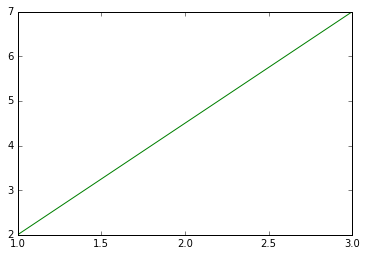

In [14]:
# Introduction to plotting a line
plt.plot([1,3], [2,7], color='green')
plt.show()

In [17]:
cities.columns

Index([u'country', u'latitude', u'longitude', u'temperature'], dtype='object')

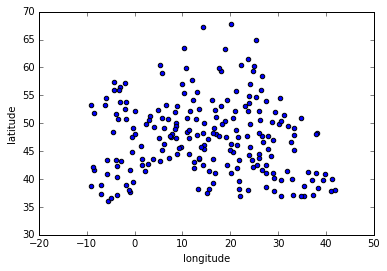

In [19]:
cities.plot.scatter(x='longitude', y='latitude')
plt.show()

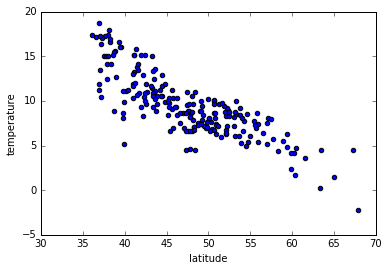

In [15]:
# Recall temperature versus latitude scatterplot

cities.plot.scatter(x='latitude', y='temperature')
plt.show()

In [20]:
?? np.polyfit

In [21]:
np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = ax + b

array([ -0.43601904,  30.20870383])

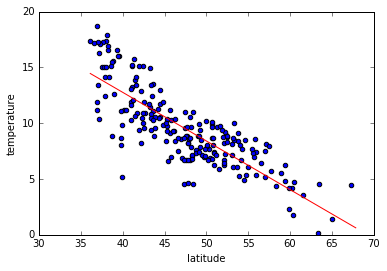

In [10]:
# Add linear regression
cities.plot.scatter(x='latitude', y='temperature')
a,b = np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = ax + b
x1 = min(cities.latitude)
x2 = max(cities.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.ylim(0,20)
plt.show()


In [36]:
cities.corr()

,latitude,longitude,temperature
latitude,1.000000,-0.105196,-0.824105
longitude,-0.105196,1.000000,-0.169308
temperature,-0.824105,-0.169308,1.000000


In [29]:
# Correlation coefficients (r values)
cc = np.corrcoef(cities.latitude, cities.temperature)[1,0]
print 'Correlation coefficient for temperature versus latitude:', cc
cc = np.corrcoef(cities.longitude, cities.temperature)[1,0]
print 'Correlation coefficient for temperature versus longitude:', cc

Correlation coefficient for temperature versus latitude: -0.824104632027
Correlation coefficient for temperature versus longitude: -0.169307504036


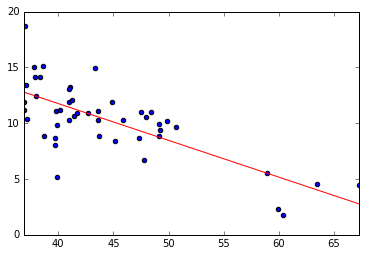

In [40]:
train = cities[(cities.country=='Norway') | (cities.country=='France') | (cities.country=='Turkey')]

plt.scatter(train.latitude, train.temperature)
a,b = np.polyfit(train.latitude, train.temperature, 1)
x1 = min(train.latitude)
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.xlim(x1,x2)
plt.show()
# Loop asking use

In [41]:
a,b

(-0.32953738946501998, 24.939836864662503)

In [12]:
import sklearn

In [13]:
sklearn.__version__

'0.15.2'

In [14]:
from sklearn.cross_validation import train_test_split

In [16]:
# Use linear regression for interactive temperature predictor
# Training data: compute latitude-temperature regression from cities
# in Norway, France, and Turkey
cities = pd.DataFrame.from_csv("Cities.csv", index_col = None)
cities = cities.sample(1)
train, test =  train_test_split(cities, test_size = 0.7)
# Compute and show regression
plt.scatter(train.latitude, train.temperature)
a,b = np.polyfit(train.latitude, train.temperature, 1)
x1 = min(train.latitude)
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.xlim(x1,x2)
plt.show()
# Loop asking user for city name, compute predicted + actual temperature
while True:
    name = raw_input('Enter city name (or "quit" to quit): ')
    if name == 'quit': break
    city = cities[cities["city"] == name]
    if len(city) == 0:
        print 'City not in dataset'
    else:
        # Use float() to convert dataframe element to value
        print 'Predicted temperature:', a * float(city.latitude) + b
        print 'Actual temperature:', float(city.temperature)

AttributeError: 'numpy.ndarray' object has no attribute 'latitude'

In [46]:
cities.columns

Index([u'country', u'latitude', u'longitude', u'temperature'], dtype='object')

In [49]:
cities[cities["country"] == "Turkey"]

,country,latitude,longitude,temperature
city,,,,
Adana,Turkey,36.99,35.32,18.67
Ankara,Turkey,39.93,32.86,9.86
Antalya,Turkey,36.89,30.70,11.88
Batman,Turkey,37.89,41.14,14.16
Bursa,Turkey,40.20,29.07,11.16
Denizli,Turkey,37.77,29.08,15.02
Edirne,Turkey,41.67,26.57,10.90
Erzincan,Turkey,39.75,39.49,8.67
Erzurum,Turkey,39.92,41.29,5.17


In [47]:
cities["country"].value_counts()

Turkey                    24
France                    18
Spain                     18
Ukraine                   15
Italy                     15
Germany                   14
United Kingdom            13
Poland                     9
Romania                    9
Sweden                     6
Belarus                    6
Norway                     5
Austria                    5
Bulgaria                   5
Hungary                    4
Finland                    4
Greece                     4
Lithuania                  3
Ireland                    3
Czech Republic             3
Netherlands                3
Switzerland                3
Serbia                     3
Slovakia                   2
Latvia                     2
Estonia                    2
Moldova                    2
Portugal                   2
Croatia                    2
Denmark                    2
Andorra                    1
Macedonia                  1
Albania                    1
Montenegro                 1
Slovenia      

### <font color="green">Your Turn: World Cup Data</font>

In [ ]:
# Read Players.csv into dataframe
f = open('Players.csv','rU')
players = pd.read_csv(f)

In [ ]:
# From the players data, compute and plot a linear regression for
# passes made (y-axis) versus minutes played (x-axis).
# Reminder: copy-paste-modify approach to programming!

In [ ]:
# Show the correlation coefficient for the passes-minutes regression.
# Also show correlation coefficients for tackles versus minutes, shots
# versus minutes, and saves versus minutes

In [ ]:
# Use linear regression for interactive number-of-passes predictor
# Training data: compute minutes-passes regression for players from
# Greece, USA, and Portugal

In [ ]:
# SUPER BONUS!!
# Repeat previous but use separate predictor for the four different positions
# (goalkeeper,defender,midfielder,forward). Does it do better?
# Try comparing correlation coefficients against one regression for all players.
#
# Note: To extract a string value from a dataframe element use df.iloc[0].element,
# e.g., if "player" is a one-row dataframe, then player.iloc[0].position returns
# the player's position as a string